https://docs.scipy.org/doc/scipy/reference/signal.html

In [1]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy import signal
import numpy as np

In [3]:
from ANEMO import ANEMO

In [4]:
import pickle
with open('parametre/param_Fit_AM_fct_velocity_2_step_False_whitening.pkl', 'rb') as fichier :
    param = pickle.load(fichier, encoding='latin1')
with open('data/enregistrement_AM_2017-10-23_100057.pkl', 'rb') as fichier :
    exp = pickle.load(fichier, encoding='latin1')

In [5]:
import os
from ANEMO import read_edf
resultats = os.path.join('data', 'enregistrement_AM_2017-10-23_100057.asc')
data = read_edf(resultats, 'TRIALID')


In [6]:
A = ANEMO(exp)
Plot = ANEMO.Plot(exp)

In [22]:
def figure(N_trial, N_block=1, plot='') :

    nb_trial = N_trial*N_block    
    fig, axs = plt.subplots(nb_trial, 2, figsize=(12*2, nb_trial*(12*1/2)/1.6180))
    
    for block in range(N_block) :
        
        for trial in range(N_trial) :
            
            trial_data = trial + 200*block
            arg = A.arg(data[trial_data], trial=trial, block=block)
            test = A.velocity_NAN(**arg) #A.velocity_deg(arg.data_x) #
            
            
            time = arg.trackertime - arg.TargetOn

            if nb_trial==1 : ax = axs
            else : ax = axs[trial]

            
            ax[0].plot(time, test, c='k', alpha=0.5)
            ax[0] = Plot.deco(ax[0], **arg)
            
            
            ax[1].plot(time, A.data_deg(arg.data_x, before_sacc=5, after_sacc=15, **arg), c='k', alpha=0.5)
            ax[1] = Plot.deco(ax[1], **arg)
            
            ax[0].set_ylabel('Velocity (°/s)', fontsize=10)
            ax[0].set_title('block %s, trial %s'%(block, trial))
            
            #------------------------------------------------
            # filtering of position data
            #------------------------------------------------
            sample_rate = 1000
            nyq_rate = sample_rate / 2 # The Nyquist rate of the signal.
            Wn = 30/nyq_rate # the critical frequencies -- cutoff du filtre
            N = 2 # The order of the filter.
            b, a = signal.butter(N, Wn, 'lowpass') # Butterworth digital and analog filter design.
            filtxdata = signal.filtfilt(b, a, arg.data_x) # Apply a digital filter forward and backward to a signal.
            filtydata = signal.filtfilt(b, a, arg.data_y)

            
            test1 = A.velocity_NAN(filtxdata, filtydata, arg.saccades, arg.trackertime, arg.TargetOn)
            
            

            ax[0].plot(time, test1, c='r')
            ax[1].plot(time, A.data_deg(filtxdata, before_sacc=5, after_sacc=15, **arg), c='r')
            
            
            
            test_1 = A.velocity_deg(filtxdata)
            filtxdata_2 = signal.filtfilt(b, a, test_1)
            f = A.supp_sacc(filtxdata_2, arg.saccades, arg.trackertime, before_sacc=5, after_sacc=15)
            ax[0].plot(time, f, c='c')
            
            
            ax[0].plot(time, A.velocity_NAN(filt='velocity-position', **arg)[0], '--g')
            ax[1].plot(time, A.data_deg(arg.data_x, before_sacc=5, after_sacc=15, filt='velocity-position', **arg), '--g')
            
            
            
            plt.tight_layout()

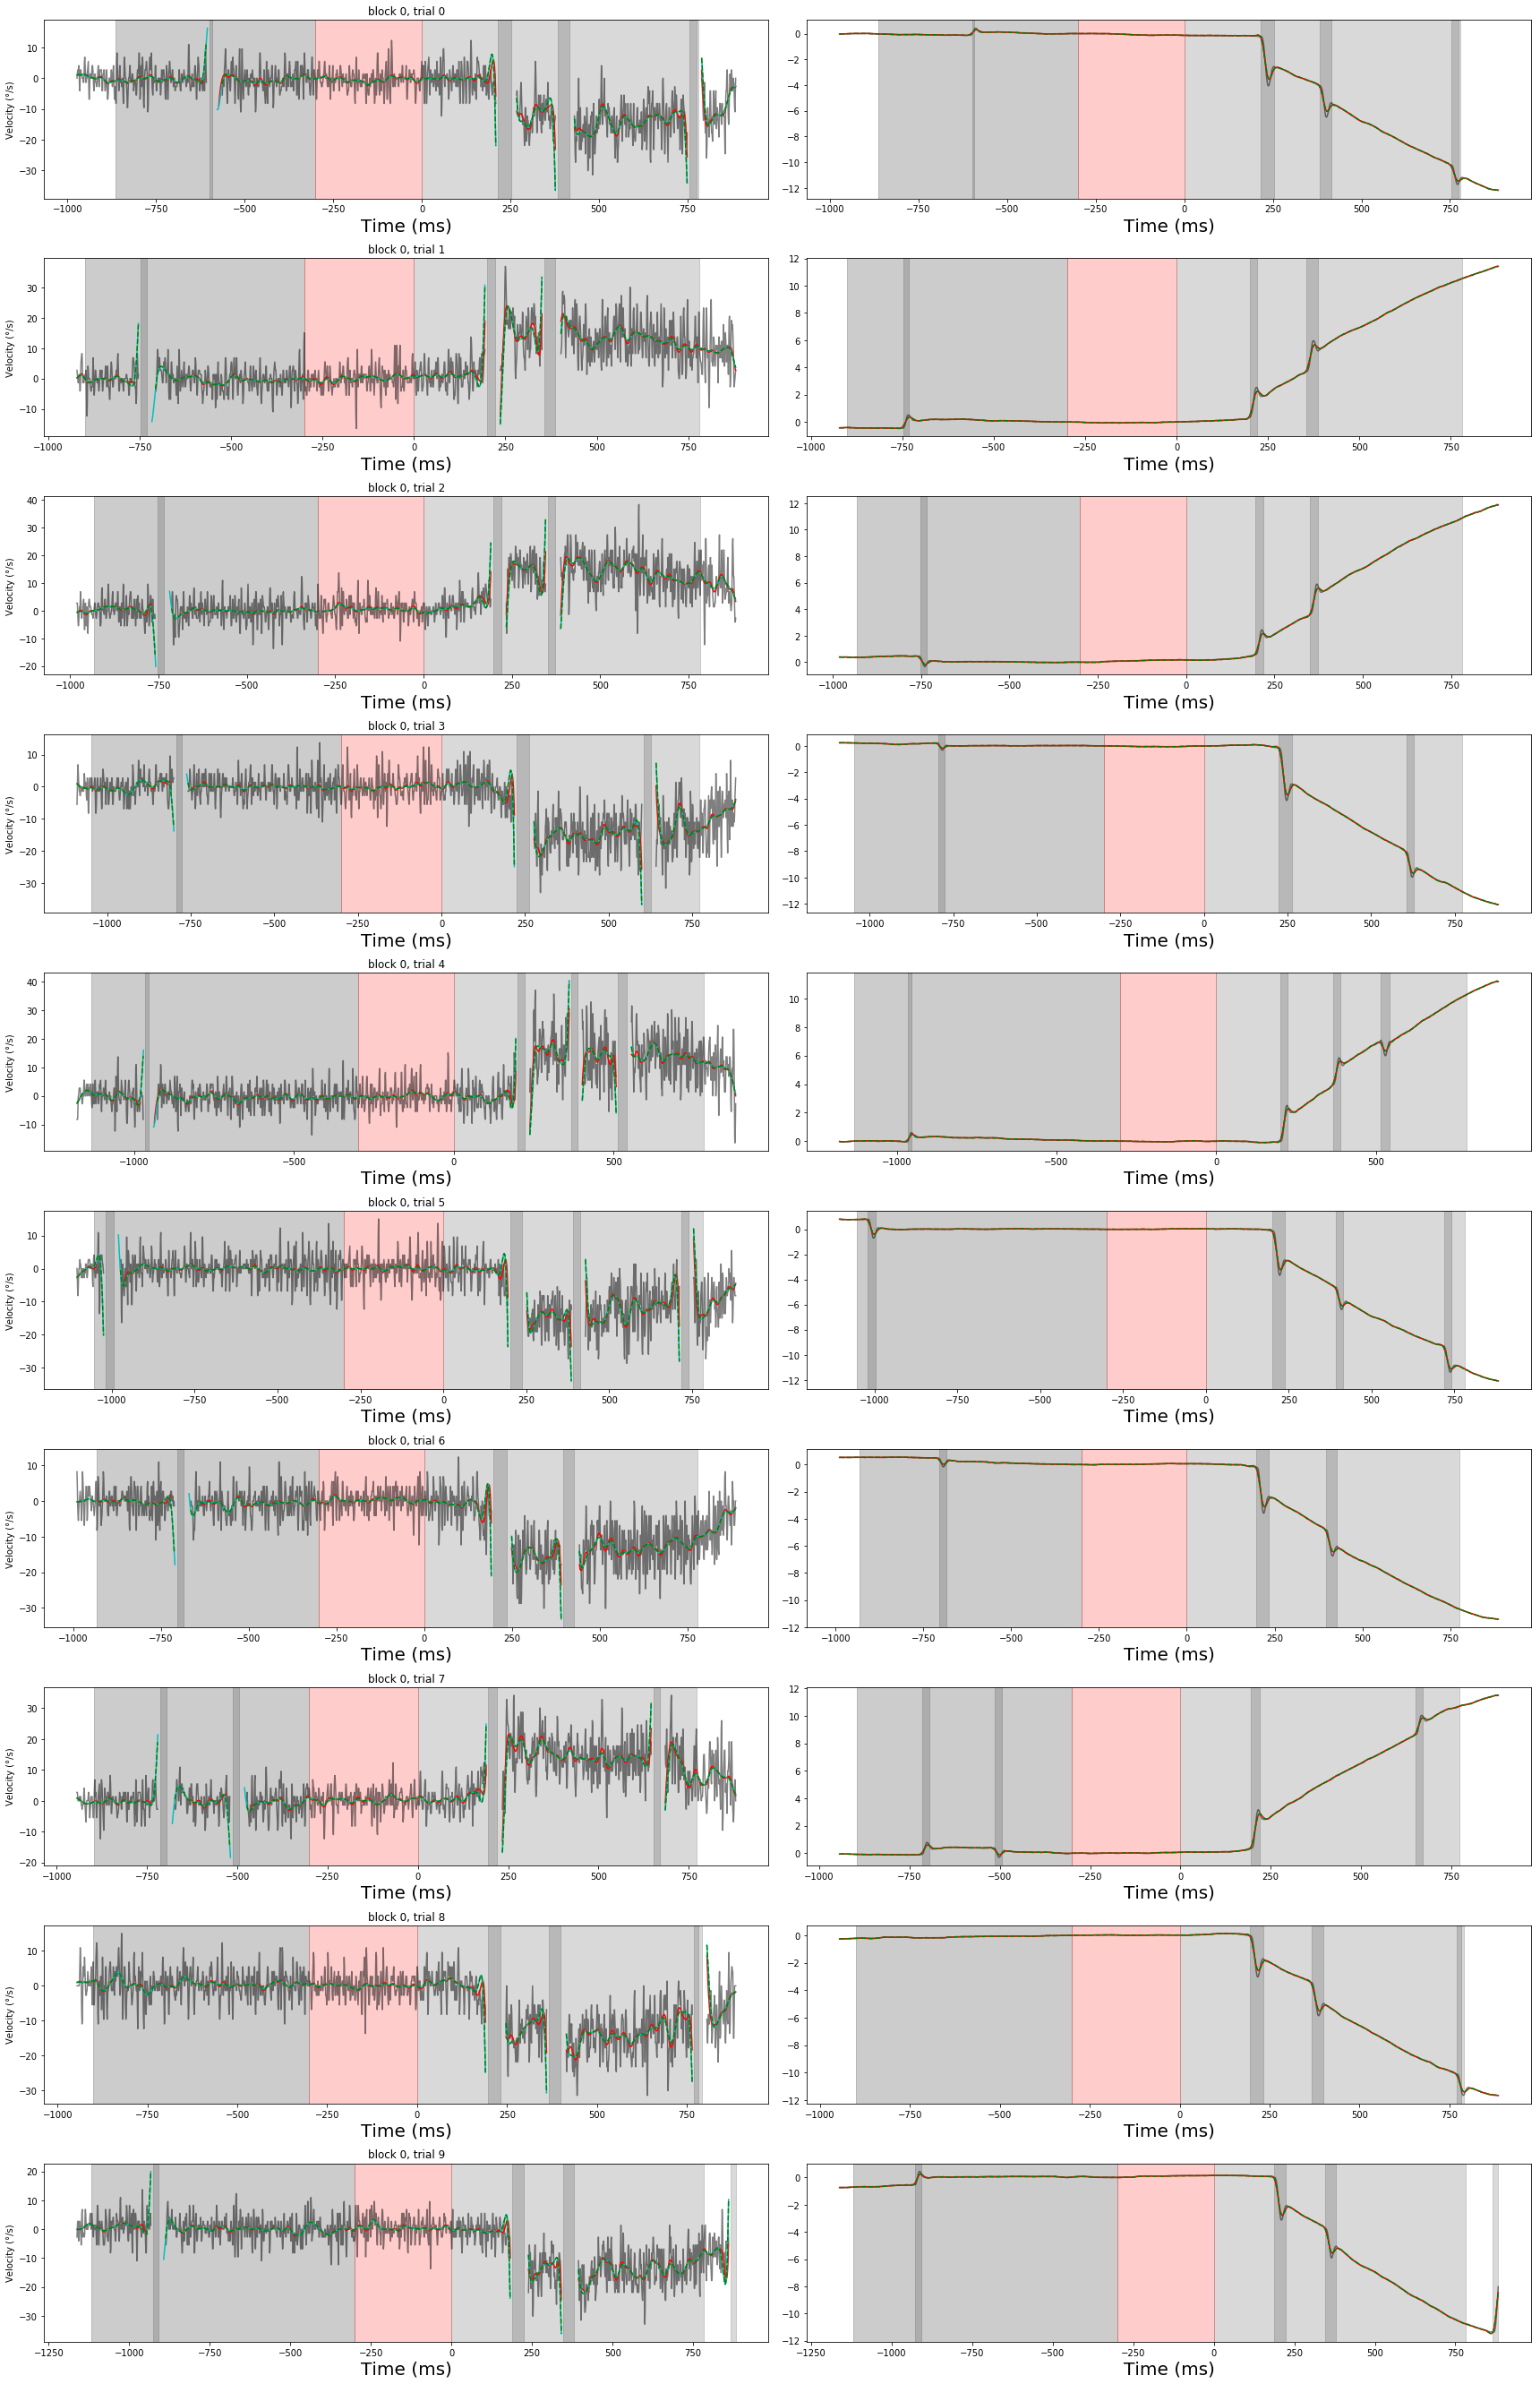

In [23]:
figure(10, N_block=1, plot='')